<a href="https://colab.research.google.com/github/Yewon9/Emotion_Recognition/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from statistics import mode, StatisticsError
import os
from tqdm import tqdm
import librosa
from matplotlib import pyplot as plt
import seaborn as sns

# DATA

## aihub_4

In [ ]:
aihub_4 = pd.read_csv('/content/drive/MyDrive/project/data_aihub/4.csv', encoding = 'CP949')
aihub_4.head()

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male


In [ ]:
aihub_4.shape

(14606, 15)

In [ ]:
def determine_majority(row):
  try:
    return mode(row[['1번 감정', '2번 감정', '3번 감정', '4번 감정', '5번 감정']].tolist())
  except StatisticsError:
    return None

In [ ]:
aihub_4['Emotion'] = aihub_4.apply(determine_majority, axis = 1)

In [ ]:
aihub_4 = aihub_4.dropna(subset = ['Emotion'])
print(aihub_4)

                         wav_id  \
0      5e258fd1305bcf3ad153a6a4   
1      5e258fe2305bcf3ad153a6a5   
2      5e258ff5305bcf3ad153a6a6   
3      5e25902f305bcf3ad153a6a9   
4      5e27f90b5807b852d9e0157b   
...                         ...   
14601  5e53d6067bef803b4851dfc6   
14602  5e53d61cc38c123b9ec6dde6   
14603  5e53d6332a2d173b73a03210   
14604  5e53d659963e443aee02b7d0   
14605  5e53d6778849ac3aacea576f   

                                                     발화문     상황    1번 감정  \
0                                       어, 청소 니가 대신 해 줘!  anger  Neutral   
1                                     둘 다 청소 하기 싫어. 귀찮아.  anger  Neutral   
2                                         둘 다 하기 싫어서 화내.  anger    Angry   
3                                            그럼 방세는 어떡해.  anger  Sadness   
4                              권태긴줄 알았는데 다른 사람이 생겼나보더라고.    sad  Sadness   
...                                                  ...    ...      ...   
14601                             아, 요즘 룸메랑 너무 

In [ ]:
front = aihub_4.iloc[:, :2]
back = aihub_4.iloc[:, -1:]

In [ ]:
aihub_4 = pd.concat([front, back], axis = 1)
aihub_4.head()

,wav_id,발화문,Emotion
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",Neutral
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,Neutral
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,Angry
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,Sadness
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness


In [ ]:
aihub_4['Path'] = '/content/drive/MyDrive/project/data_aihub/4/' + aihub_4['wav_id'] + '.wav'
aihub_4.head()

,wav_id,발화문,Emotion,Path
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",Neutral,/content/drive/MyDrive/project/data_aihub/4/5e...
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,Neutral,/content/drive/MyDrive/project/data_aihub/4/5e...
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,Angry,/content/drive/MyDrive/project/data_aihub/4/5e...
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,Sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness,/content/drive/MyDrive/project/data_aihub/4/5e...


## aihub_5

In [ ]:
aihub_5 = pd.read_csv('/content/drive/MyDrive/project/data_aihub/5.csv', encoding = 'CP949')
aihub_5.head()

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5ed10dbc2880d70f286121c3,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,disgust,Angry,2,Angry,2,Angry,2,Angry,2,Angry,2,33,female
1,5ecb60ef9aa8ea0eec53edb1,지금도 그대로 있어. 치우는 사람이 없어.,disgust,Neutral,0,Disgust,2,Sadness,2,Disgust,2,Disgust,1,48,female
2,5f052858b140144dfcfef768,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,sad,Sadness,2,Sadness,1,Sadness,2,Sadness,2,Sadness,2,48,female
3,5f0e72c4b140144dfcff3fa5,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,sad,Sadness,1,Sadness,2,Sadness,2,Sadness,2,Sadness,2,48,female
4,5ed10ddd7e21a10eee2537ce,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,disgust,Angry,2,Angry,2,Angry,2,Angry,2,Sadness,2,33,female


In [ ]:
aihub_5.shape

(10011, 15)

In [ ]:
aihub_5['Emotion'] = aihub_5.apply(determine_majority, axis = 1)

In [ ]:
aihub_5 = aihub_5.dropna(subset = ['Emotion'])
print(aihub_5)

                         wav_id  \
0      5ed10dbc2880d70f286121c3   
1      5ecb60ef9aa8ea0eec53edb1   
2      5f052858b140144dfcfef768   
3      5f0e72c4b140144dfcff3fa5   
4      5ed10ddd7e21a10eee2537ce   
...                         ...   
10006  5f05ffd5b140144dfcff01c7   
10007  5ec53bf82880d70f28611de0   
10008  5f0b2b5ab140144dfcff2759   
10009  5f0b2b75b140144dfcff275a   
10010  5f0527b3b140144dfcfef75e   

                                                     발화문       상황    1번 감정  \
0              개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.  disgust    Angry   
1                                지금도 그대로 있어. 치우는 사람이 없어.  disgust  Neutral   
2                          맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.      sad  Sadness   
3            오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.      sad  Sadness   
4               그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!  disgust    Angry   
...                                                  ...      ...      ...   
10006  너의 말 대로 약속 장소를 옮겨 보는 것도 좋은

In [ ]:
front = aihub_5.iloc[:, :2]
back = aihub_5.iloc[:, -1:]

In [ ]:
aihub_5 = pd.concat([front, back], axis = 1)
aihub_5.head()

,wav_id,발화문,Emotion
0,5ed10dbc2880d70f286121c3,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,Angry
1,5ecb60ef9aa8ea0eec53edb1,지금도 그대로 있어. 치우는 사람이 없어.,Disgust
2,5f052858b140144dfcfef768,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,Sadness
3,5f0e72c4b140144dfcff3fa5,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,Sadness
4,5ed10ddd7e21a10eee2537ce,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,Angry


In [ ]:
aihub_5['Path'] = '/content/drive/MyDrive/project/data_aihub/5/' + aihub_5['wav_id'] + '.wav'
aihub_5.head()

,wav_id,발화문,Emotion,Path
0,5ed10dbc2880d70f286121c3,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,Angry,/content/drive/MyDrive/project/data_aihub/5/5e...
1,5ecb60ef9aa8ea0eec53edb1,지금도 그대로 있어. 치우는 사람이 없어.,Disgust,/content/drive/MyDrive/project/data_aihub/5/5e...
2,5f052858b140144dfcfef768,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,Sadness,/content/drive/MyDrive/project/data_aihub/5/5f...
3,5f0e72c4b140144dfcff3fa5,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,Sadness,/content/drive/MyDrive/project/data_aihub/5/5f...
4,5ed10ddd7e21a10eee2537ce,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,Angry,/content/drive/MyDrive/project/data_aihub/5/5e...


## aihub_5_2

In [ ]:
aihub_5_2 = pd.read_csv('/content/drive/MyDrive/project/data_aihub/5_2.csv', encoding = 'CP949')
aihub_5_2.head()

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,angry,2,surprise,2,happiness,2,happiness,2,happiness,2,48,female
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,neutral,0,happiness,2,happiness,2,happiness,2,happiness,2,48,female
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,2,48,female
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,1,48,female
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral,happiness,2,happiness,1,happiness,2,happiness,1,happiness,1,48,female


In [ ]:
aihub_5_2.shape

(19374, 15)

In [ ]:
aihub_5_2['Emotion'] = aihub_5_2.apply(determine_majority, axis = 1)

In [ ]:
aihub_5_2 = aihub_5_2.dropna(subset = ['Emotion'])
print(aihub_5_2)

                         wav_id  \
0      5f4141e29dd513131eacee2f   
1      5f4141f59dd513131eacee30   
2      5f4142119dd513131eacee31   
3      5f4142279dd513131eacee32   
4      5f3c9ed98a3c1005aa97c4bd   
...                         ...   
19369  5fbe313c44697678c497c05a   
19370  5fbe251044697678c497bfb8   
19371  5fbe31584c55eb78bd7cee7f   
19372  5fbe2f8544697678c497c047   
19373  5fbe36714c55eb78bd7ceea3   

                                                     발화문         상황  \
0                                       헐! 나 이벤트에 당첨 됐어.  happiness   
1            내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.  happiness   
2                            한 명 뽑는 거였는데, 그게 바로 내가 된 거야.  happiness   
3      당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...  happiness   
4                       에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.    neutral   
...                                                  ...        ...   
19369                                      나 엘리베이터에 갇혔어.       fear   
19370      

In [ ]:
front = aihub_5_2.iloc[:, :2]
back = aihub_5_2.iloc[:, -1:]

In [ ]:
aihub_5_2 = pd.concat([front, back], axis = 1)
aihub_5_2.head()

,wav_id,발화문,Emotion
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,happiness


In [ ]:
aihub_5_2['Path'] = '/content/drive/MyDrive/project/data_aihub/5_2/' + aihub_5_2['wav_id'] + '.wav'
aihub_5_2.head()

,wav_id,발화문,Emotion,Path
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,/content/drive/MyDrive/project/data_aihub/5_2/...
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,/content/drive/MyDrive/project/data_aihub/5_2/...
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,/content/drive/MyDrive/project/data_aihub/5_2/...
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness,/content/drive/MyDrive/project/data_aihub/5_2/...
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,happiness,/content/drive/MyDrive/project/data_aihub/5_2/...


## aihub

In [ ]:
aihub = pd.concat([aihub_4, aihub_5, aihub_5_2], axis = 0)
aihub

,wav_id,발화문,Emotion,Path
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",Neutral,/content/drive/MyDrive/project/data_aihub/4/5e...
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,Neutral,/content/drive/MyDrive/project/data_aihub/4/5e...
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,Angry,/content/drive/MyDrive/project/data_aihub/4/5e...
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,Sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
...,...,...,...,...
19369,5fbe313c44697678c497c05a,나 엘리베이터에 갇혔어.,sadness,/content/drive/MyDrive/project/data_aihub/5_2/...
19370,5fbe251044697678c497bfb8,하지만 기분이 나쁜 걸 어떡해?,sadness,/content/drive/MyDrive/project/data_aihub/5_2/...
19371,5fbe31584c55eb78bd7cee7f,자취방 엘리베이턴데 정전인가봐.,sadness,/content/drive/MyDrive/project/data_aihub/5_2/...
19372,5fbe2f8544697678c497c047,나 드디어 프로젝트 끝났어!,sadness,/content/drive/MyDrive/project/data_aihub/5_2/...


In [ ]:
aihub = aihub.drop_duplicates(subset = '발화문')
aihub.shape

(37212, 4)

In [ ]:
emotion_counts = aihub['Emotion'].value_counts()
emotion_counts

,count
Emotion,
Sadness,11088
Angry,5410
neutral,5233
sadness,3021
happiness,2981
Neutral,1780
angry,1700
Fear,1396
disgust,1320


In [ ]:
aihub['Emotion'] = aihub['Emotion'].str.lower()

<ipython-input-30-825f5e21d148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aihub['Emotion'] = aihub['Emotion'].str.lower()


In [ ]:
emotion_counts = aihub['Emotion'].value_counts()
emotion_counts

,count
Emotion,
sadness,14109
angry,7110
neutral,7013
happiness,3250
disgust,2451
fear,2325
surprise,954


In [ ]:
aihub.shape

(37212, 4)

In [ ]:
aihub = aihub[aihub['Path'].apply(lambda x: os.path.exists(x))]
aihub.shape

(37196, 4)

In [ ]:
aihub = aihub.iloc[:, [2, 3]]
aihub = aihub.rename(columns = {'감정' : 'Emotions', 'Path' : 'Path'})
aihub

,Emotion,Path
0,neutral,/content/drive/MyDrive/project/data_aihub/4/5e...
1,neutral,/content/drive/MyDrive/project/data_aihub/4/5e...
2,angry,/content/drive/MyDrive/project/data_aihub/4/5e...
3,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
4,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
...,...,...
19366,neutral,/content/drive/MyDrive/project/data_aihub/5_2/...
19367,neutral,/content/drive/MyDrive/project/data_aihub/5_2/...
19368,sadness,/content/drive/MyDrive/project/data_aihub/5_2/...
19370,sadness,/content/drive/MyDrive/project/data_aihub/5_2/...


In [ ]:
aihub.to_csv('aihub.csv', index = False, encoding = 'utf-8-sig')

# EDA

In [ ]:
data = pd.read_csv('aihub.csv')
data.shape

(37196, 2)

In [ ]:
emotion_counts = data['Emotion'].value_counts()
emotion_counts

,count
Emotion,
sadness,14098
angry,7108
neutral,7010
happiness,3250
disgust,2451
fear,2325
surprise,954


In [ ]:
data = data[data['Emotion'] != 'surprise']
data.shape

(36242, 2)

In [ ]:
emotions_to_downsample = ['sadness', 'angry', 'neutral', 'happiness']

In [ ]:
dfs = []
for emotion in emotions_to_downsample:
    emotion_data = data[data['Emotion'] == emotion]
    if len(emotion_data) > 2500:
        downsampled_data = emotion_data.sample(n = 2500, random_state = 42)
    else:
        downsampled_data = emotion_data
    dfs.append(downsampled_data)

In [ ]:
disgust_data = data[data['Emotion'] == 'disgust']
fear_data = data[data['Emotion'] == 'fear']
dfs.append(disgust_data)
dfs.append(fear_data)

In [ ]:
final_df = pd.concat(dfs)
final_df.shape

(14776, 2)

In [ ]:
print(final_df['Emotion'].value_counts())

Emotion
sadness      2500
angry        2500
neutral      2500
happiness    2500
disgust      2451
fear         2325
Name: count, dtype: int64


In [ ]:
final_df.to_csv('balanced_emotion_data.csv', index = False)

In [3]:
balanced_data = pd.read_csv('balanced_emotion_data.csv')

In [4]:
tqdm.pandas()

def get_audio_length(file_path):
  try:
    y, sr = librosa.load(file_path, sr = None)
    return librosa.get_duration(y = y, sr= sr)
  except:
    return None

In [5]:
balanced_data['Length'] = balanced_data['Path'].progress_apply(get_audio_length)

100%|██████████| 14776/14776 [2:15:31<00:00,  1.82it/s]


In [6]:
mean_length = balanced_data['Length'].mean()
median_length = balanced_data['Length'].median()
min_length = balanced_data['Length'].min()
max_length = balanced_data['Length'].max()

print(f"평균 길이: {mean_length:.2f}초")
print(f"중앙값 길이: {median_length:.2f}초")
print(f"최소 길이: {min_length:.2f}초")
print(f"최대 길이: {max_length:.2f}초")

평균 길이: 6.17초
중앙값 길이: 5.63초
최소 길이: 1.11초
최대 길이: 41.51초


In [7]:
q1 = balanced_data['Length'].quantile(0.25)
q3 = balanced_data['Length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = balanced_data[(balanced_data['Length'] < lower_bound) | (balanced_data['Length'] > upper_bound)]
print(f"이상값 개수: {len(outliers)}")

이상값 개수: 394


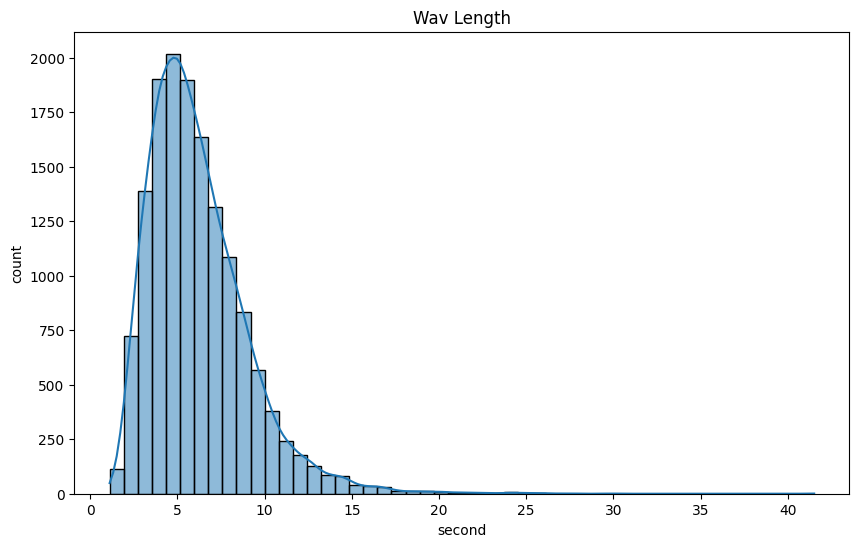

In [8]:
plt.figure(figsize = (10, 6))
sns.histplot(balanced_data['Length'], bins = 50, kde = True)
plt.title('Wav Length')
plt.xlabel('second')
plt.ylabel('count')
plt.show()

In [10]:
balanced_data.to_csv('balanced_data_length.csv', index = False)

In [11]:
data_emotion_filtered = balanced_data[balanced_data['Length'] <= upper_bound]

print(f"필터링 후 데이터 개수: {len(data_emotion_filtered)}")
print(data_emotion_filtered)

필터링 후 데이터 개수: 14382
       Emotion                                               Path    Length
0      sadness  /content/drive/MyDrive/project/data_aihub/4/5e...  3.626667
1      sadness  /content/drive/MyDrive/project/data_aihub/5/5e...  7.381333
2      sadness  /content/drive/MyDrive/project/data_aihub/4/5e...  6.101333
3      sadness  /content/drive/MyDrive/project/data_aihub/4/5e...  3.029333
4      sadness  /content/drive/MyDrive/project/data_aihub/4/5e...  8.448000
...        ...                                                ...       ...
14771     fear  /content/drive/MyDrive/project/data_aihub/5_2/...  6.400000
14772     fear  /content/drive/MyDrive/project/data_aihub/5_2/...  5.717333
14773     fear  /content/drive/MyDrive/project/data_aihub/5_2/...  4.949333
14774     fear  /content/drive/MyDrive/project/data_aihub/5_2/...  5.120000
14775     fear  /content/drive/MyDrive/project/data_aihub/5_2/...  3.840000

[14382 rows x 3 columns]


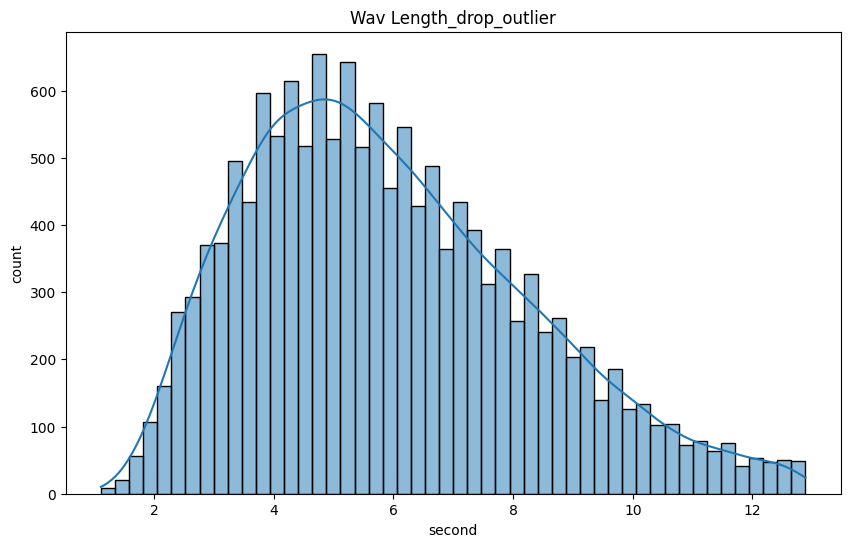

In [13]:
plt.figure(figsize = (10, 6))
sns.histplot(data_emotion_filtered['Length'], bins = 50, kde = True)
plt.title('Wav Length_drop_outlier')
plt.xlabel('second')
plt.ylabel('count')
plt.show()

In [14]:
data_emotion_filtered = data_emotion_filtered.iloc[:, [0, 1]]
data_emotion_filtered

,Emotion,Path
0,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
1,sadness,/content/drive/MyDrive/project/data_aihub/5/5e...
2,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
3,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
4,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
...,...,...
14771,fear,/content/drive/MyDrive/project/data_aihub/5_2/...
14772,fear,/content/drive/MyDrive/project/data_aihub/5_2/...
14773,fear,/content/drive/MyDrive/project/data_aihub/5_2/...
14774,fear,/content/drive/MyDrive/project/data_aihub/5_2/...


In [15]:
data_emotion_filtered = data_emotion_filtered[data_emotion_filtered['Path'].apply(lambda x: os.path.exists(x))]
data_emotion_filtered.shape

(14382, 2)

In [16]:
data_emotion_filtered = data_emotion_filtered.reset_index(drop = True)
data_emotion_filtered

,Emotion,Path
0,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
1,sadness,/content/drive/MyDrive/project/data_aihub/5/5e...
2,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
3,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
4,sadness,/content/drive/MyDrive/project/data_aihub/4/5e...
...,...,...
14377,fear,/content/drive/MyDrive/project/data_aihub/5_2/...
14378,fear,/content/drive/MyDrive/project/data_aihub/5_2/...
14379,fear,/content/drive/MyDrive/project/data_aihub/5_2/...
14380,fear,/content/drive/MyDrive/project/data_aihub/5_2/...


In [17]:
emotion_counts = data_emotion_filtered['Emotion'].value_counts()
emotion_counts

,count
Emotion,
neutral,2485
happiness,2465
disgust,2414
angry,2401
sadness,2395
fear,2222


In [18]:
data_emotion_filtered.to_csv('data_emotion.csv', index = False)